# Credit Risk Prediction System

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [6]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
df.columns = df.columns.str.strip()

### EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

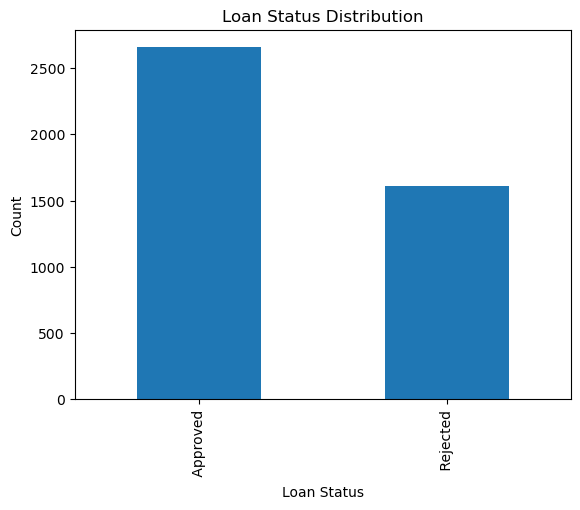

In [10]:
plt.figure()
df['loan_status'].value_counts().plot(kind='bar')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

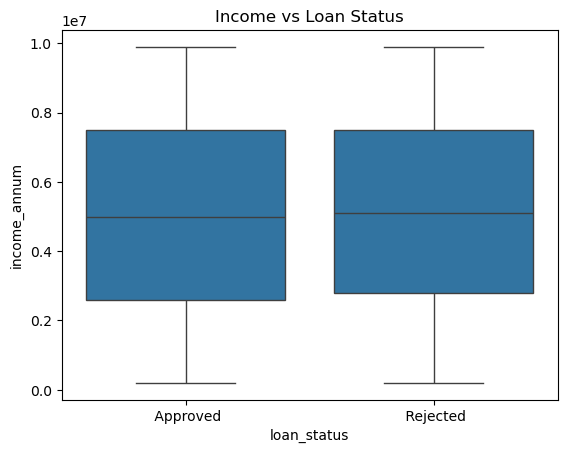

In [11]:
plt.figure()
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.title('Income vs Loan Status')
plt.show()

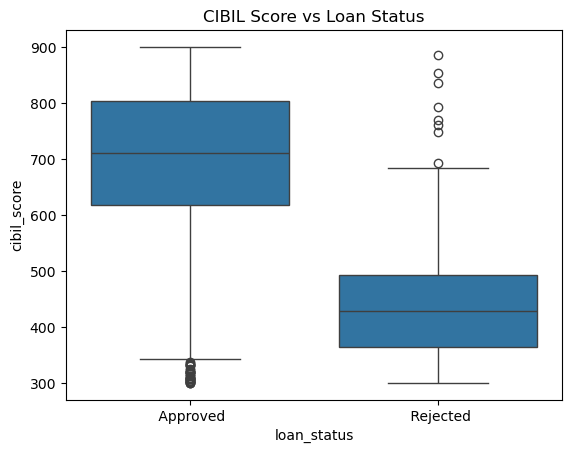

In [12]:
plt.figure()
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title('CIBIL Score vs Loan Status')
plt.show()


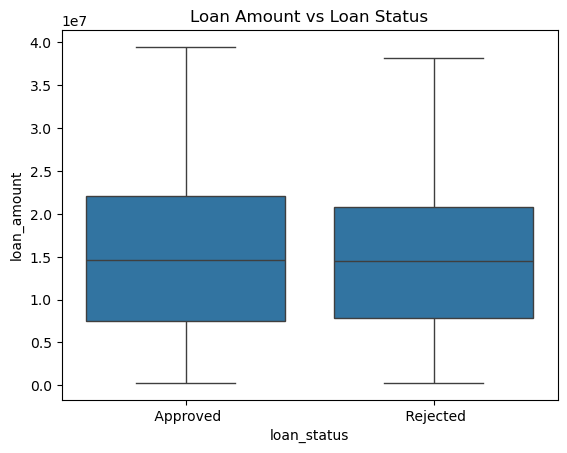

In [13]:

plt.figure()
sns.boxplot(x='loan_status', y='loan_amount', data=df)
plt.title('Loan Amount vs Loan Status')
plt.show()


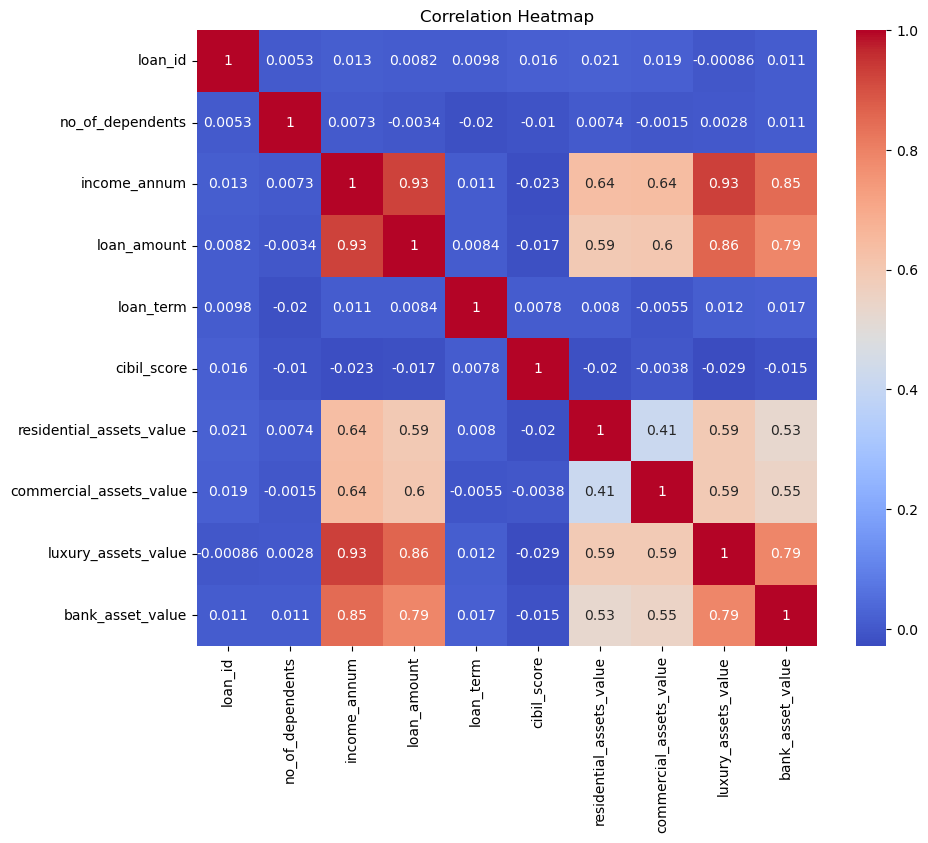

In [14]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


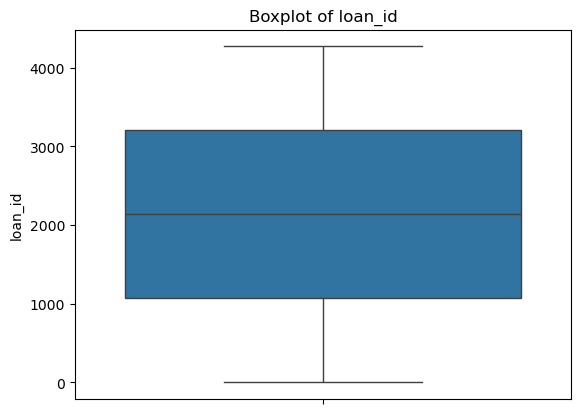

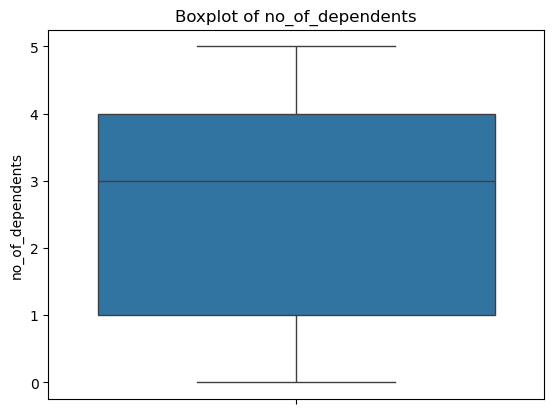

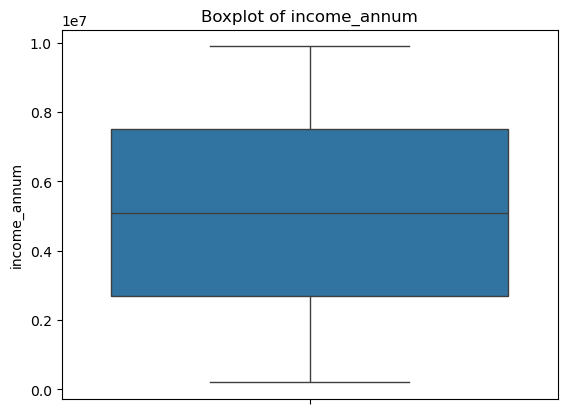

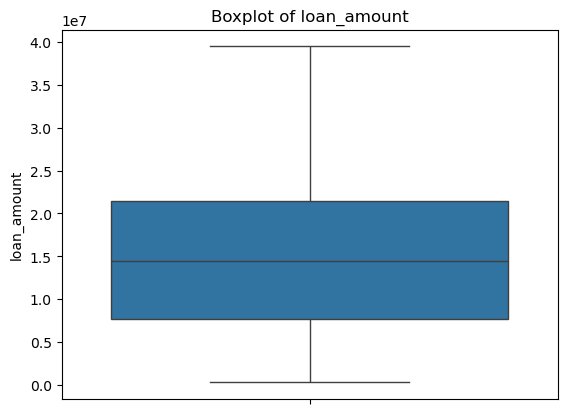

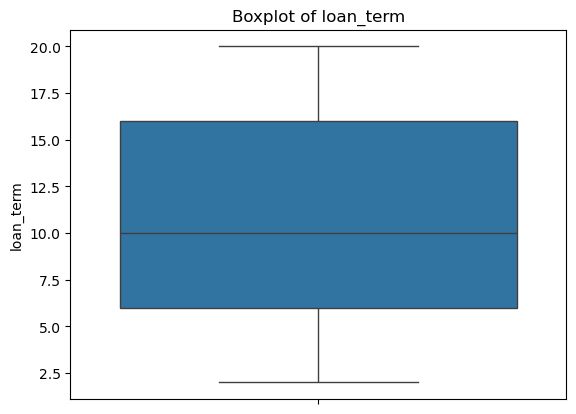

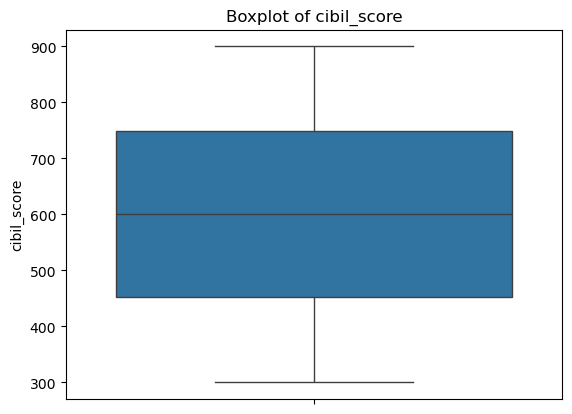

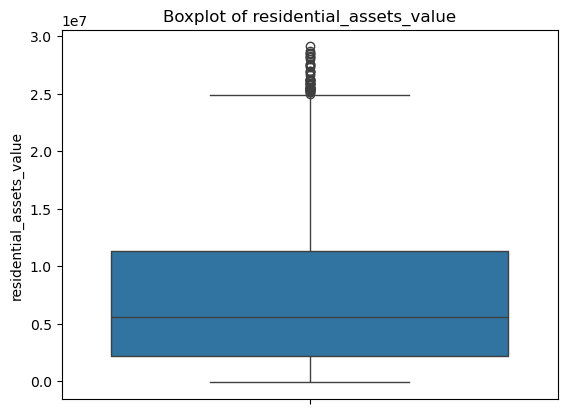

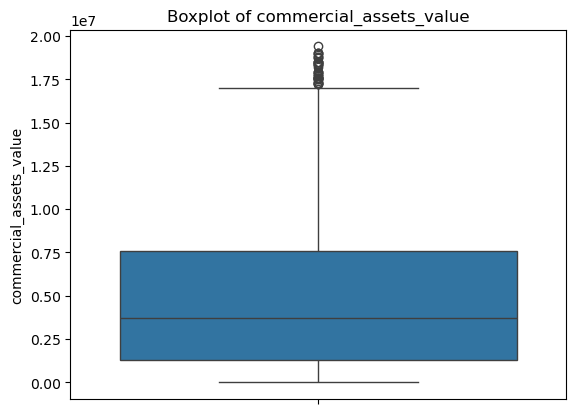

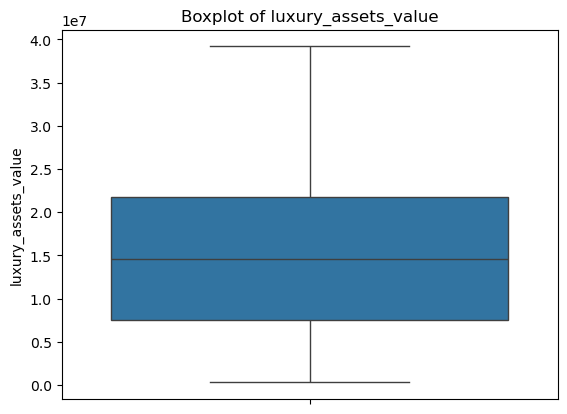

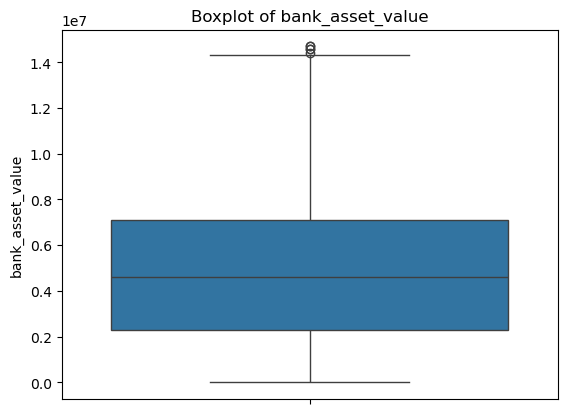

In [15]:
for col in numeric_df.columns:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


### Encoding

In [16]:
df['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [17]:
df['loan_status'] = df['loan_status'].str.strip().str.lower()

df['loan_status'] = df['loan_status'].map({
    'approved': 0,
    'rejected': 1
})

In [18]:
df['loan_status'].unique()


array([0, 1], dtype=int64)

In [19]:
df['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [20]:
df['education'] = df['education'].str.strip().str.lower()

df['education'] = df['education'].map({
    'graduate': 1,
    'not graduate': 0
})

In [21]:
df['self_employed'].unique()

array([' No', ' Yes'], dtype=object)

In [22]:
df['self_employed'] = df['self_employed'].str.strip().str.lower()

df['self_employed'] = df['self_employed'].map({
    'yes': 1,
    'no': 0
})

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int64
 3   self_employed             4269 non-null   int64
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


In [24]:
df['monthly_income'] = df['income_annum'] / 12

In [25]:
df['monthly_loan_pay'] = df['loan_amount'] / df['loan_term']

In [26]:
df['debt_to_income_ratio'] = df['monthly_loan_pay']/ df['monthly_income']

In [27]:
df[['income_annum', 'loan_amount', 'loan_term', 'debt_to_income_ratio']].head()


,income_annum,loan_amount,loan_term,debt_to_income_ratio
0,9600000,29900000,12,3.114583
1,4100000,12200000,8,4.463415
2,9100000,29700000,20,1.958242
3,8200000,30700000,8,5.615854
4,9800000,24200000,20,1.481633


In [28]:
df['loan_to_income_ratio'] = df['loan_amount'] / df['income_annum']


In [29]:
df.drop(columns=['monthly_income', 'monthly_loan_pay'], inplace=True)


In [30]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,debt_to_income_ratio,loan_to_income_ratio
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,3.114583,3.114583
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,4.463415,2.975610
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,1.958242,3.263736
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,5.615854,3.743902
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,1.481633,2.469388


In [31]:
X = df.drop(columns=["loan_id", "loan_status"])
y = df["loan_status"]


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.2,
                                                    random_state= 42,
                                                    stratify= y)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value',
    'loan_to_income_ratio',
    'debt_to_income_ratio'
]

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

In [34]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state= 42)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [36]:
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

In [37]:
lr.fit(X_train_sm, y_train_sm)


LogisticRegression(max_iter=1000)

In [38]:
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

In [39]:
gb.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(random_state=42)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score

models = {
    "LogisticRegression": lr,
    "RandomForest":rf,
    "GradientBoosting" : gb
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,-1]

    print(f"\n{name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))


LogisticRegression
[[499  32]
 [ 18 305]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       531
           1       0.91      0.94      0.92       323

    accuracy                           0.94       854
   macro avg       0.94      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854

ROC-AUC: 0.9780249893594072

RandomForest
[[517  14]
 [  3 320]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       531
           1       0.96      0.99      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

ROC-AUC: 0.9908432596946004

GradientBoosting
[[514  17]
 [  3 320]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       531
           1       0.95      0.99      0.97       323

    a

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
    "class_weight": ["balanced"]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid.fit(X_train_sm, y_train_sm)

best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)


Best Parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [42]:
best_model

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [43]:
import joblib

joblib.dump(best_model, "credit_risk_model.pkl")


['credit_risk_model.pkl']

In [44]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']